# Research Skills: Image Analysis 
## Take-home Assignment - Part 2 
Sharon Ong and Itir Önal, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2020-2021

Your First Name:

Your Last Name: 

Your Student ID: 

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

## Processing an image of coins

In [46]:
import numpy as np 
from matplotlib import pyplot as plt 
from skimage import io, img_as_float, img_as_ubyte, filters, color, img_as_bool, exposure, feature
from skimage.morphology import square, rectangle, diamond, disk, cube,  octahedron, ball, star, octagon
from skimage.morphology import binary_dilation, binary_erosion, binary_opening,binary_closing
from skimage.morphology import dilation, erosion, opening, closing, white_tophat, remove_small_objects, reconstruction
import os
import cv2
from PIL import Image
from skimage.filters import try_all_threshold
from scipy import ndimage as ndi
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.morphology import watershed
from skimage.feature import peak_local_max, canny

%matplotlib inline


1. (5 points) Read the image of coins you have been provided and display it with an appropriate title.

   Marks breakdown: 3 points for loading the image and 2 points for displaying with a title.

   **Display the image with an appropriate title.**

(<matplotlib.image.AxesImage at 0x1ea84e00188>,
 Text(0.5, 1.0, 'Noisy Coin Image'))

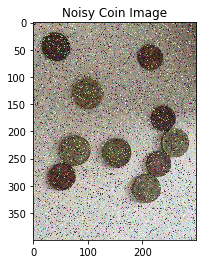

In [7]:
os.chdir('C:\\Users\\aro13\\Downloads') # Working Directory.
im_noisy = io.imread("2048852_coin_image.jpg") # Read in the image.
plt.imshow(im_noisy), plt.title("Noisy Coin Image")

2. (10 points) Remove the salt and pepper noise in the image and display the denoised image with an appropriate title. Marks breakdown: 5 points for removing salt noise, 5 points for removing pepper noise.

   **Report the steps you took briefly to denoise the image as comments in your code.**

(<matplotlib.image.AxesImage at 0x1ea861be488>,
 Text(0.5, 1.0, 'Morphologically Denoised Image \n (Opening + Closing)'))

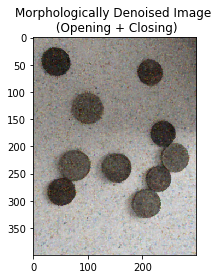

In [20]:
im_open = opening(im_noisy, ball(1)) #Opening operator to remove saltwith a small disk size.
im = closing(im_open, ball(1)) #Closing operator on the opened image to remove the pepper.

# ball shape SE used because image is # dimensional

plt.imshow(im), plt.title("Morphologically Denoised Image \n (Opening + Closing)") # Show the image

3. (30 points) Segment the coins to obtain a binary image where pixels representing the coins are set to 1. You should compare two image segmentation algorithms and you can apply morphological operations on these images.

   Marks breakdown: maximum of 15 points for each method. Comparing two thresholding algorithms only counts for 1 method. For each method: 8 points if you do not segment out the background pixels as foreground. Full points if each method successfully segments all the coin regions with the original shape of the coins. If the object shapes are slightly distorted, you may not get full marks.

   **Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles.**

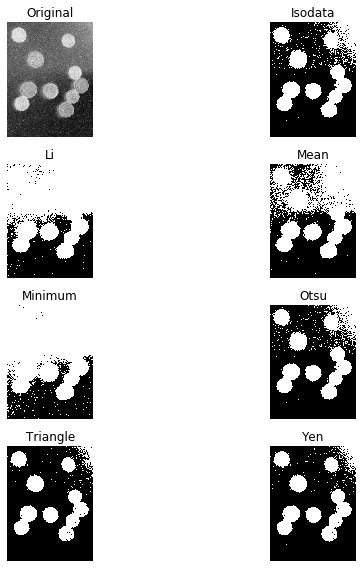

(<matplotlib.axes._subplots.AxesSubplot at 0x1ea96ebb888>,
 Text(0.5, 1.0, 'Binary image after removing small objects'))

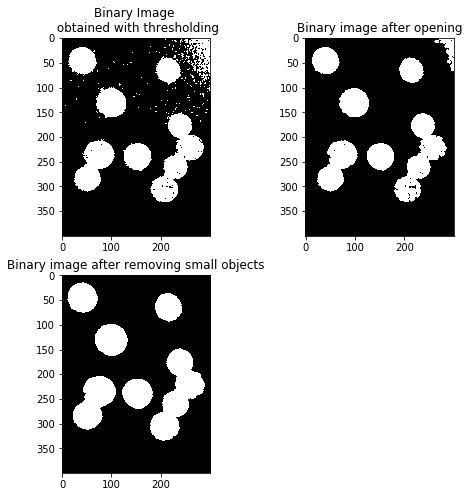

In [81]:
im_gray = color.rgb2gray(im)  #normalize this.

     ## Segmentation algorithm 1

fig= try_all_threshold(-im_gray, figsize=(10, 8), verbose=False)
plt.show()
 # This function shows that the Triangle and Yen method of intensity thresholding yield the best results.

imbw = im_gray < filters.threshold_triangle(im_gray) #Triangle method is chosen for thresholding

    # morphological operation on the binary image. disk 3 is chosen as it is the best in terms of preserving foreground contour and size.
imbw_open = binary_opening(imbw, disk(3))

im1 = remove_small_objects(imbw_open, 1900, connectivity=4) # remove objects smaller than the coins. (as these are not foregroundobjects)
im1 = binary_dilation(im1, disk(3)) #Final image for Segmentation Algorithm 1

plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.imshow(imbw, cmap = 'gray'), plt.title("Binary Image \n obtained with thresholding")
plt.subplot(2,2,2), plt.imshow(imbw_open, cmap = 'gray'), plt.title("Binary image after opening")
plt.subplot(2,2,3), plt.imshow(im1, cmap = 'gray'), plt.title("Binary image after removing small objects") 

4. (15 points) Using the binary image as input, write code to output a new image containing

   (a) only the coins which overlap or touch each other
   
   (b) only non-overlapping coins
   
   Marks breakdown: 7.5 points for the overlapping/touching coins image and 7.5 points for the nonoverlapping coins image.

   **Display both images with appropriate titles. Report the steps you took as comments in your code.**

(<matplotlib.axes._subplots.AxesSubplot at 0x1ea885dfe48>,
 Text(0.5, 1.0, 'non-overlapping coins'))

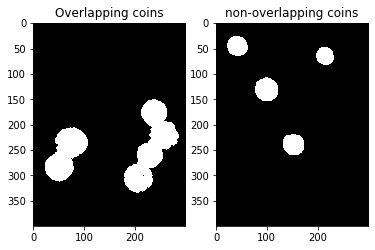

In [47]:
from scipy import ndimage as ndi
#   # Overlapping/Touching coins
overlap = remove_small_objects(im1, 3400, connectivity=4)

#   # non-Overlapping coins
edges = canny(im_gray, sigma = 3) # bring the contours of the coins using edge-based segmentation
fill_coins = ndi.binary_fill_holes(edges) # the non-overlappping coins are are now circles with a big hole. we fill these.

im_non = erosion(fill_coins, disk(7)) # after filling the non-overlapping coins, we erode away the (shape of) the overlapping coins.
plt.figure(figsize =(6,5))
plt.subplot(1,2,1),plt.imshow(overlap, cmap = 'gray'), plt.title("Overlapping coins")
plt.subplot(1,2,2),plt.imshow(im_non, cmap = 'gray'), plt.title("non-overlapping coins")

5. (20 points) Sets of white pixels which are connected to each other are called connected components or objects. 

   (i) connect all the connected components and visualize each connected component with a different color overlaid on the denoised image. 
   
   (ii) separate the touching coins (visualize each coin with a different color overlaid on the denoised image).

   Marks breakdown: 7 points for connecting pixels to form connected components in (i). 8 points for applying an algorithm to separate the touching objects. 5 points for fully separating each object in (ii) such that there is no over segmentation or under segmentation and each object has approximately the same size as the coins in the original image.

   **Display the resulting images with appropriate titles. Report the steps you took as comments in your code.**

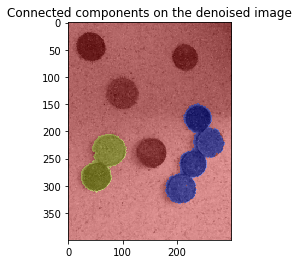

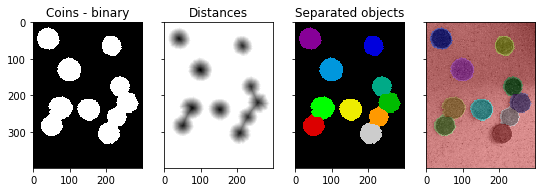

In [85]:
#   # Question 5.A
label_img = label(overlap) #label the foreground objects with different colors
image_label_overlay = label2rgb(label_img, image=im) # overlaid on the denoised image.

plt.imshow(image_label_overlay), plt.title("Connected components on the denoised image")

#   # Question 5.B
from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(im1) # compute the distance transform to the nearest nonzero pixel

#The two lines of code computes markers based on local maxima of distance transform.
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((5,5)), labels=im1) 
markers = ndi.label(local_maxi)[0]

labels = watershed(-distance, markers, mask=im1) # flood initialization with complement of distance transform.

im2 = label2rgb(labels, image = im) #overlay the color label on the original denoised image. 

fig, axes = plt.subplots(ncols=4, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im1, cmap=plt.cm.gray)
ax[0].set_title('Coins - binary')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')
ax[3].imshow(im2)

6. (10 points) Show your original image with an overlay of bounding boxes or circular boundaries of each coin you found. List the number of coins your code found.

   Marks breakdown: 8 points displaying the bounding boxes or circular boundaries where the boxes or circles bound each coin. 2 points for code to calculate the number of coins in the image.

   **Display the resulting images with appropriate titles. Print the number of coins. Report the steps you took as comments in your code.**

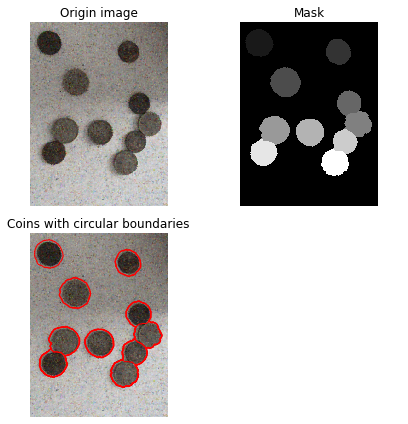

Counting number of coins


(-0.5, 299.5, 399.5, -0.5)

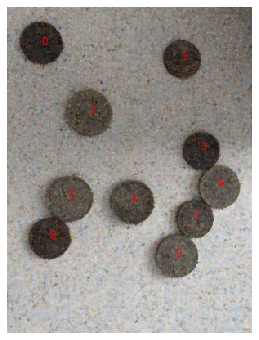

In [102]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation, measure


# Compute a mask by opening. Lines are better drawn on the color segmented coin image object 'labels'
mask = labels
mask = opening(mask, disk(3))


## Counting number of items.
regions = regionprops(labels)


# Display result 
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6,6))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(im)
ax1.set_title("Origin image")

ax2.imshow(mask, cmap="gray")
ax2.set_title("Mask")

ax3.imshow(im)
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title("Coins with circular boundaries")

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()


plt.figure(figsize=(6,6))
plt.imshow(im, cmap=plt.cm.gray)

print('Counting number of coins')

for (i, props) in zip(range(len(regions)), regions):
    # , displays the ID of each object at it's centroid.  
    y0, x0 = props.centroid
    plt.text(x0, y0,i,color='r')

plt.axis('off')    # We have ten foreground objects in the image. 

7. (10 points) The image contains 5 cents and 50 cents. Indicate the amount of money your code finds in the image. Show your original image with an overlay of green points on the centroids of 5 cents and red points on the centroids of 50 cents.

   Marks breakdown: 8 points displaying the centroids with appropriate colors on 5 cents and 50 cents. 2 points for code to calculate the amount of money present in the image.

   **Display the resulting images with appropriate titles. Print the amount of money in the image. Report the steps you took as comments in your code.**